Analiza podatkov

In [1]:
import pandas as pd
%matplotlib inline

RECEPTI=pd.read_csv("podatki.csv")
RECEPTI

,Ime recepta,Število sestavin,Število besed v receptu,Število odstavkov,Težavnost,Čas priprave,Čas kuhanja,Skupni čas,Vrsta kuhinje,Energijska vrednost na porcijo
0,V pečici pečene polnjene (filane) paprike,17,231,7,1,30 min,1 h 40 min,2 h 10 min,Kosilo,146 kCal
1,Sataraš,7,107,4,1,15 min,20 min,35 min,Balkanska,68.62 kCal
2,Solata s stročjim fižolom in krompirjem,13,119,6,1,25 min,15 min,40 min,Solate,80.16 kCal
3,Preprost kolač s slivami,12,180,5,1,15 min,1 h 0 min,1 h 15 min,Sladice,370.4 kCal
4,Affogato,3,45,2,1,5 min,0 min,5 min,Pijača,231.3 kCal
...,...,...,...,...,...,...,...,...,...,...
6582,Čulbastija,5,63,2,1,15 min,30 min,45 min,Balkanska,217.71 kCal
6583,Sadna solata,5,80,4,1,20 min,0 min,20 min,Poletje,49.9 kCal
6584,Brancin iz pečice,10,165,7,2,20 min,1 h 0 min,1 h 20 min,Ribe in morski sadeži,88.23 kCal
6585,Žepki s čemažem in kozjo skuto,8,135,4,2,30 min,20 min,50 min,Vegetarijanstvo,200.3 kCal


<Axes: xlabel='Vrsta kuhinje'>

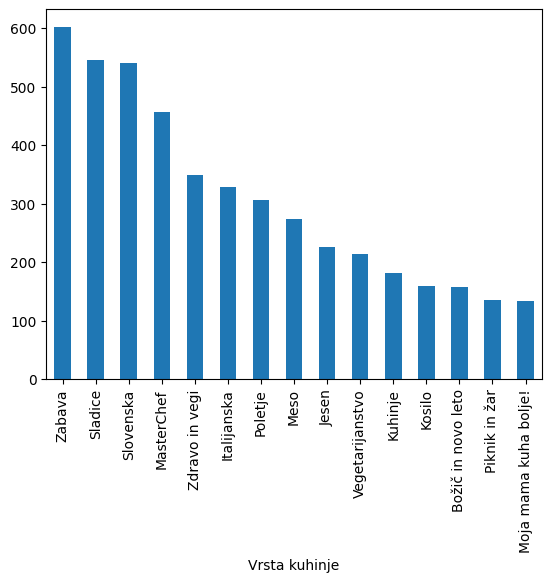

In [2]:
podtabela = RECEPTI[["Vrsta kuhinje"]].copy()
po_vrsti_kuhinje = podtabela.groupby("Vrsta kuhinje").size()
df = pd.DataFrame(po_vrsti_kuhinje, columns=['Count']).reset_index().sort_values('Count', ascending=False)

# vzamem "n" (15) stolpcev ker obstaja preko 80 različnih oznak za vrsto kuhinje na strani okusno.je
n = 15
df_top_n = df.head(n)


df_top_n.plot.bar(x='Vrsta kuhinje', y='Count', legend=False)

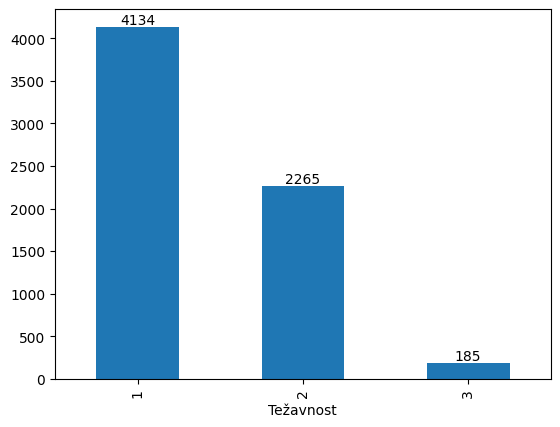

In [3]:
podtabela2 = RECEPTI[["Težavnost"]].copy()
po_težavnosti = podtabela2.groupby("Težavnost").size()

resetan_index = pd.DataFrame(po_težavnosti, columns=['Count']).reset_index().sort_values('Count', ascending=False)

# vzamem samo 3 stolpce ker obstaja še 4. stolpec, kjer so recepti ki niso imeli težavnosti
n = 3
res_top_n = resetan_index.head(n)
#oštevilčenje
graf = res_top_n.plot.bar(x='Težavnost', y='Count', legend=False)
for index, value in enumerate(res_top_n['Count']):
    graf.text(index, value, str(value), ha='center', va='bottom')
